In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import sympy as sy
from sympy import var, S, Matrix as M, Array as A
sy.init_printing(True)

# Задание №1 
__Построить сечение поверхности обратных 
скоростей плоскостью XY для с учетом пьезоэффекта__

_Материал: Парателлурит (TeO2)_

## Вычисление

In [37]:
class Task:
    
    def __init__(self, c, eps, e):
        # instance variables
        self.c = c 
        self.eps = eps
        self.e = e
        # class variables
        self.i2v = M([[0,5,4],[5,1,3],[4,3,2]])
        self.phi = np.linspace(0, 2*np.pi, 361)

    @staticmethod
    def _mm(i,j):
        return min(i,j), max(i,j)
    
    def _c_to_tenzor(self):
        I3 = range(3)
        tenzor =  [[[[ self.c[ self._mm( self.i2v[i, j] + 1, self.i2v[k,l] + 1 ) ]for l in I3 ]for k in I3 ]for j in I3 ]for i in I3]
        return np.array(tenzor)
    
    def _e_to_tenzor(self):
        I3 = range(3)
        tenzor =  [[[ self.e[ self._mm( i+1, self.i2v[j,k] + 1 ) ]for k in I3 ]for j in I3 ]for i in I3 ]
        return np.array(tenzor)
    
    def _slow(self, n, piezo):
        c_TeO = self._c_to_tenzor()
        if piezo:
            e_TeO = self._e_to_tenzor()
            zn = np.einsum('jk,j,k', self.eps, n, n)
            ch1 = np.einsum('pij,p', e_TeO, n)
            ch2 = np.einsum('qkl,q', e_TeO, n)
            ch = np.einsum('ij,kl->ijkl', ch1, ch2) 
            c_add = ch*10/zn  # пьезо добавка
            cc = c_TeO + c_add
            chris = np.einsum('ijkl,j,k', cc, n, n)
            return 1/np.sort(la.eigvals(chris))

        else:
            return 1/np.sort(la.eigvals(np.einsum('ijkl,j,k', c_TeO, n, n)))
        
    def get_slow_curve(self, piezo=True):
        return np.array([self._slow([np.cos(p), np.sin(p), 0], piezo) for p in self.phi])

## тензор Кристоффеля

In [52]:
c = np.zeros((7, 7)) 
c[1, 1] = 5.6
c[1, 2] = 5.1
c[1, 3] = 2.2
c[2, 2] = c[1,1]
c[2, 3] = c[1,3]
c[3, 3] = 10.6
c[4, 4] = 2.65
c[5, 5] = c[4,4]
c[6, 6] = 6.6
c

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  5.6 ,  5.1 ,  2.2 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  5.6 ,  2.2 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , 10.6 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  2.65,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.65,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  6.6 ]])

## диэлектрическая проницаемость

In [53]:
epsilon = np.zeros((3, 3)) 
epsilon[0, 0] = 20
epsilon[1, 1] = 20
epsilon[2, 2] = 20
epsilon

array([[20.,  0.,  0.],
       [ 0., 20.,  0.],
       [ 0.,  0., 20.]])

## тензор пьезоэлектрических констант

In [54]:
e = np.zeros((4, 7)) 
e[1,4]= -0.22
e[2,5] = - e[1,4]
e

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.22,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.22,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

## Результат

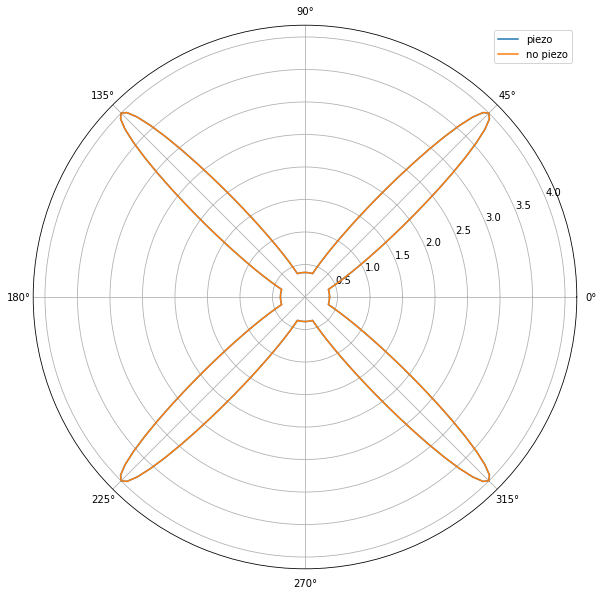

In [55]:
task = Task(c, epsilon, e)

fig, ax = plt.subplots()

ax = plt.subplot(111, projection='polar')
plt.plot(task.phi, task.get_slow_curve(True).T[0], label='piezo')
plt.plot(task.phi, task.get_slow_curve(False).T[0], label='no piezo')
plt.legend()
fig.set_size_inches(10, 10) 